# Week 4 Assignment

In [141]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import edhec_risk_kit_207 as erk # created by JLC to add functions from lab_23.ipynb and lab_24.ipynb
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Load the 49 Value Weighted industry portfolio returns. Limit the analysis to returns of the 49 VW portfolios from the most recent 5 years for which you have data i.e 2014-2018 both years inclusive. Also load the Market Caps of each of the 49 industries.

In [142]:
ind49_rets = erk.get_ind_returns(weighting="vw", n_inds=49)["2014":]
ind49_mcap = erk.get_ind_market_caps(49, weights=True)["2014":]
inds = ind49_rets.columns
ind49_mcap.head()

,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
2014-01,0.003195,0.016964,0.009687,0.008478,0.012581,0.001497,0.007838,0.000974,0.020731,0.009513,...,0.002065,0.021903,0.012734,0.067461,0.015058,0.087880,0.040513,0.002009,0.024015,0.050001
2014-02,0.003036,0.016957,0.009283,0.008744,0.011959,0.001417,0.008191,0.000944,0.020050,0.009116,...,0.002064,0.022260,0.012890,0.064583,0.014811,0.087787,0.039718,0.002034,0.023512,0.048411
2014-03,0.002994,0.017020,0.009058,0.008503,0.011823,0.001396,0.008552,0.000977,0.019846,0.009201,...,0.002129,0.021689,0.012886,0.065351,0.014813,0.086435,0.039411,0.002040,0.023150,0.047475
2014-04,0.003093,0.017461,0.009103,0.008829,0.012118,0.001452,0.007893,0.000969,0.020102,0.009058,...,0.002090,0.022153,0.012870,0.064142,0.014993,0.088473,0.040032,0.001975,0.023237,0.049913
2014-05,0.003008,0.017468,0.009550,0.008367,0.012834,0.001436,0.007549,0.000952,0.020638,0.008730,...,0.002063,0.022437,0.012816,0.063659,0.014827,0.084368,0.039481,0.001918,0.022710,0.051581


Assume that the cap-weights as of the first month (2014-01) are the cap-weights we’ll use for this analysis.

In [143]:
cov = ind49_rets.cov()
#erk.weight_cw takes the cap weights at index 1, that is 2014-02 when we want 2014-01
#cw = erk.weight_cw(ind49_rets, cap_weights=ind49_mcap)
cw = ind49_mcap.loc[ind49_rets.index[0]]
#cw = cw/cw.sum() #cw.sum() is 1, so no need to
cw

Agric    0.003195
Food     0.016964
Soda     0.009687
Beer     0.008478
Smoke    0.012581
Toys     0.001497
Fun      0.007838
Books    0.000974
Hshld    0.020731
Clths    0.009513
Hlth     0.004713
MedEq    0.013895
Drugs    0.082970
Chems    0.019345
Rubbr    0.001834
Txtls    0.000970
BldMt    0.004366
Cnstr    0.006153
Steel    0.003572
FabPr    0.000271
Mach     0.023140
ElcEq    0.005911
Autos    0.013947
Aero     0.013772
Ships    0.000860
Guns     0.002698
Gold     0.000686
Mines    0.003975
Coal     0.000893
Oil      0.075920
Util     0.032890
Telcm    0.054935
PerSv    0.003217
BusSv    0.019899
Hardw    0.016487
Softw    0.095938
Chips    0.058337
LabEq    0.012937
Paper    0.010371
Boxes    0.002065
Trans    0.021903
Whlsl    0.012734
Rtail    0.067461
Meals    0.015058
Banks    0.087880
Insur    0.040513
RlEst    0.002009
Fin      0.024015
Other    0.050001
Name: 2014-01, dtype: float64

## 1. Question 1
Which Industry had the highest risk contribution in the cap-weighted portfolio?
Enter your answer as text, exactly as they are named in the Data file (i.e. Hlth, Fin, Whlsl, Rtail, or Food)

<AxesSubplot: title={'center': 'Risk Contributions of a CW portfolio'}>

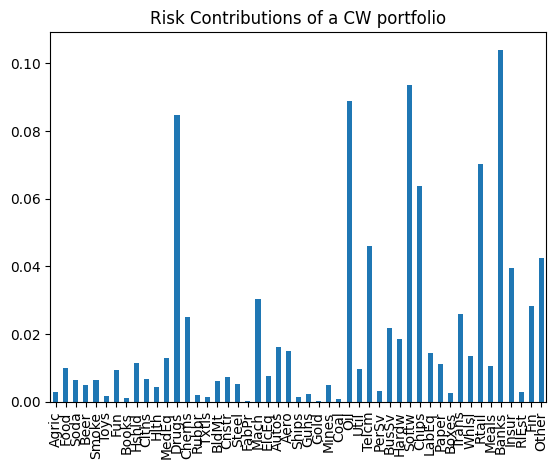

In [144]:
rc_cw = erk.risk_contribution(cw, cov)
rc_cw.plot.bar(title="Risk Contributions of a CW portfolio")

In [145]:
rc_cw.idxmax() # The answer is Banks

'Banks'

## 2. Question 2
Use the same data as the previous question. What was the highest risk contribution from any one industry in the cap-weighted portfolio?
Enter the answer as a percentage  (e.g. for 5.67% enter 5.67)

In [146]:
round(rc_cw.max()*100, 2) # The answer is 10.41

10.41

## 3. Question 3
Use the same data set as the previous question.
Which Industry had the highest risk contribution in the equal-weighted portfolio?
Enter your answer as text, exactly as they are named in the Data file (i.e. Hlth, Fin, Whlsl, Rtail, or Food)

In [147]:
ew = erk.weight_ew(ind49_rets)
rc_ew = erk.risk_contribution(ew, cov)
rc_ew.idxmax() # The answer is Steel

'Steel'

## 4. Question 4
Use the same data as the previous question.
What was the highest risk contribution from any one industry in the equal-weighted portfolio?
Enter the answer as a percentage  (e.g. for 5.67% enter 5.67)

In [148]:
round(rc_ew.max()*100, 2) # The answer is 3.09

3.09

## 5. Question 5
Using the Sample Covariance over the 5 year period, compute the weights of the ERC portfolio. What sector portfolio is assigned the highest weight in the ERC portfolio?
Enter your answer as text, exactly as they are named in the Data file (i.e. Hlth, Fin, Whlsl, Rtail, or Food)

In [149]:
rw = erk.equal_risk_contributions(cov)
inds[np.argmax(rw)] # Answer is Util

'Util'

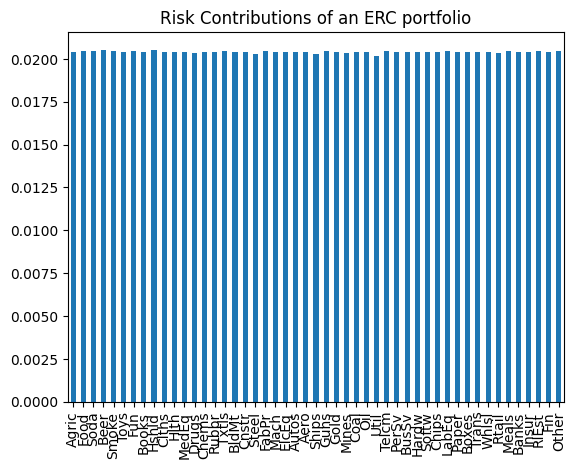

In [150]:
erk.risk_contribution(rw, cov).plot.bar(title="Risk Contributions of an ERC portfolio");

## 6. Question 6
Using the same data as the previous question (Sample Covariance over the 5 year period, and the initial capweights over that period) compute the weights of the ERC portfolio. What is the weight of the sector portfolio that is assigned the highest weight in the ERC portfolio?
Enter the answer as a percentage  (e.g. for 5.67% enter 5.67)

In [151]:
round(rw.max()*100, 2) # Answer is 5.22

5.22

## 7. Question 7
Use the same data as the previous question (Sample Covariance over the 5 year period, and the initial capweights over that period) and the weights of ERC portfolio. What sector portfolio is assigned the lowest weight in the ERC portfolio?
Enter your answer as text, exactly as they are named in the Data file (i.e. Hlth, Fin, Whlsl, Rtail, or Food)

In [152]:
inds[np.argmin(rw)] # Answer is Steel

'Steel'

## 8. Question 8
Use the same data as the previous question (Sample Covariance over the 5 year period, and the initial capweights over that period) and the weights of ERC portfolio.
What is the weight of the sector portfolio that is assigned the lowest weight in the ERC portfolio?
Enter the answer as a percentage  (e.g. for 5.67% enter 5.67)

In [153]:
round(rw.min()*100, 2) # Answer is 1.28

1.28

## 9. Question 9
Use the same data as you used in the previous question (Sample Covariance over the 5  year period and the initial capweights over that period).
In the cap-weighted portfolio what is the difference in risk contributions between the largest contributor to portfolio risk and the smallest contributor to portfolio risk?
Enter the answer as a percentage  (e.g. for 5.67% enter 5.67)

In [154]:
round((rc_cw.max()-rc_cw.min())*100, 2) # The answer is 10.40

10.4

## 10. Question 10
Use the same data as you used in the previous question (Sample Covariance over the 5  year period and the initial capweights over that period).
In the equal-weighted portfolio what is the difference in risk contributions between the largest contributor to portfolio risk and the smallest contributor to portfolio risk?
Enter the answer as a percentage  (e.g. for 5.67% enter 5.67)

In [155]:
round((rc_ew.max()-rc_ew.min())*100, 2) # The answer is 2.50

2.5